# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys

from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

SEED = 420
#file_path="content/"
file_path="./data"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

datasets=[data1,data2,data3]

n_samples=
150
n_samples=
6118
n_samples=
86558


# Visualize Datasets

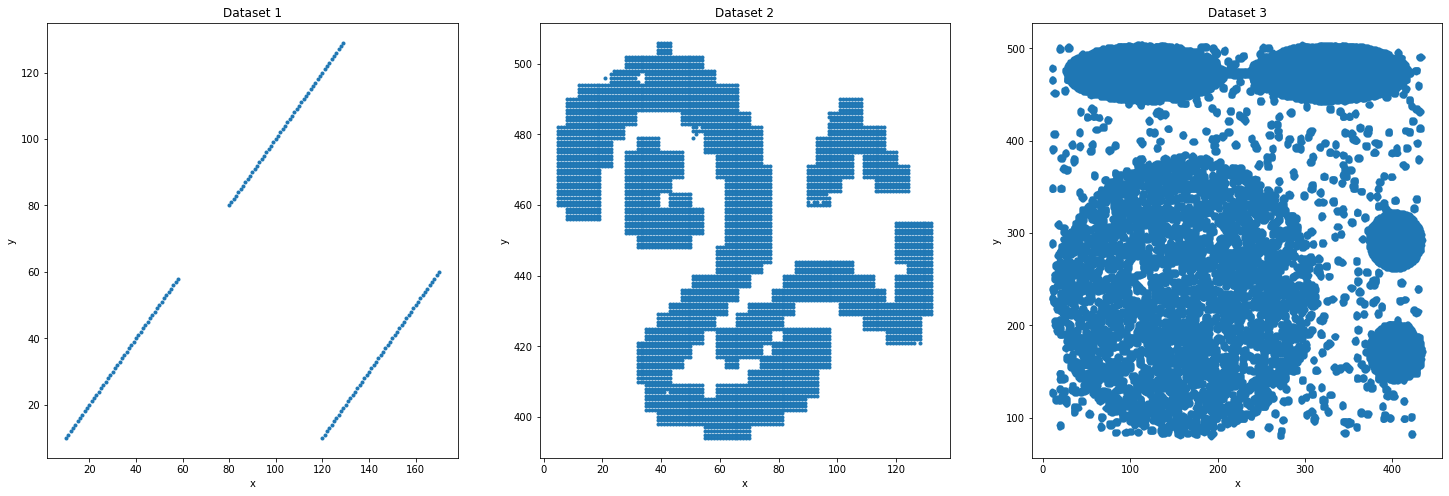

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,8))

for i, (data, ax) in enumerate(zip(datasets,axes)):
    ax.scatter(data[:,0],data[:,1],marker='.')
    ax.set_title("Dataset {}".format(i+1))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    

In [3]:
def plot_2dclusters(data, labels, ax):
    ax.scatter(data[:,0],data[:,1], c=labels, cmap='tab10',marker='.')
    

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [4]:
from sklearn.cluster import KMeans

k=4
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

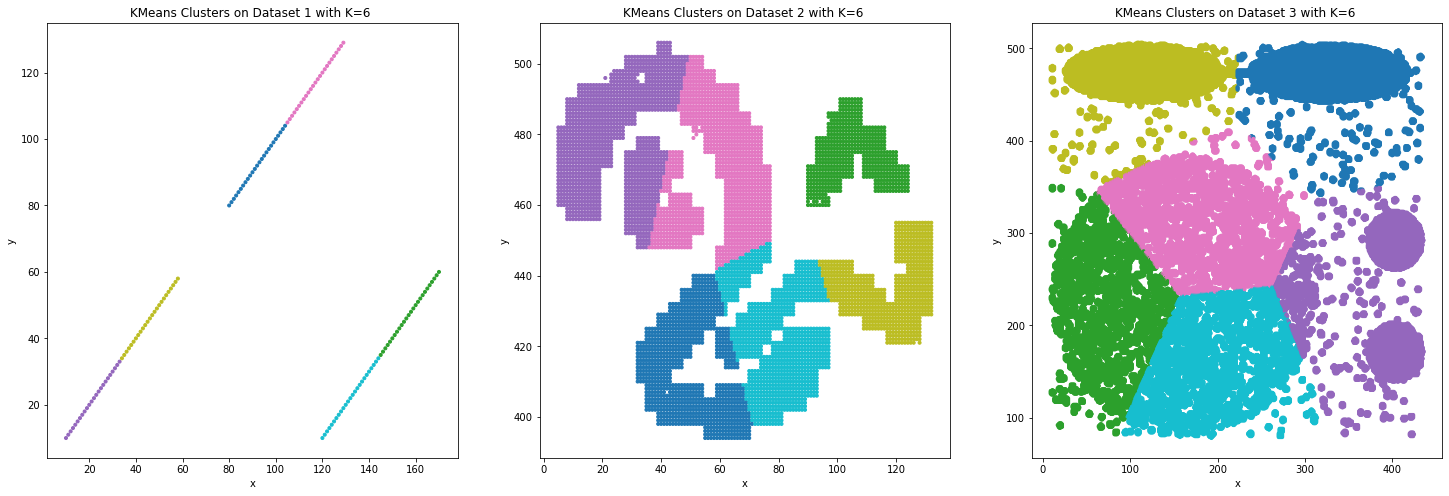

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(25,8))
np.random.seed(SEED)
K=6

for i, (data, ax) in enumerate(zip(datasets,axes)):
    kmeans = KMeans(n_clusters=K, random_state=SEED).fit(data)
    plot_2dclusters(data,kmeans.labels_,ax)
    
    ax.set_title("KMeans Clusters on Dataset {} with K={} ".format(i+1,K))
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Clusters Evaluation

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [6]:
from sklearn.metrics import silhouette_samples

def find_best_K(data, estimator,low_K=2, high_K=100):
    """ Find the best number of clusters for a given dataset and a kmeans estimator instance, trying
    every value of low_K <=k < high_K.
    The estimator is fitted inside this function.
    
    Return: array of tested k, array of scores, best k, best score"""
    scores = []
    k_clusters = []
    
    for k in range(low_K,high_K):
        estimator.set_params(n_clusters=k)
        estimator.fit(data)
        
        scores.append(silhouette_samples(data, estimator.labels_).mean()) # keep track of silhouette scores
        k_clusters.append(k) # keep track of k
    
    best_idx = np.argmax(scores)
    
    return k_clusters, scores, k_clusters[best_idx], scores[best_idx] # choose K that maximize the utility function

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

CPU times: user 2h 1min 39s, sys: 16min 45s, total: 2h 18min 25s
Wall time: 1h 44min 15s


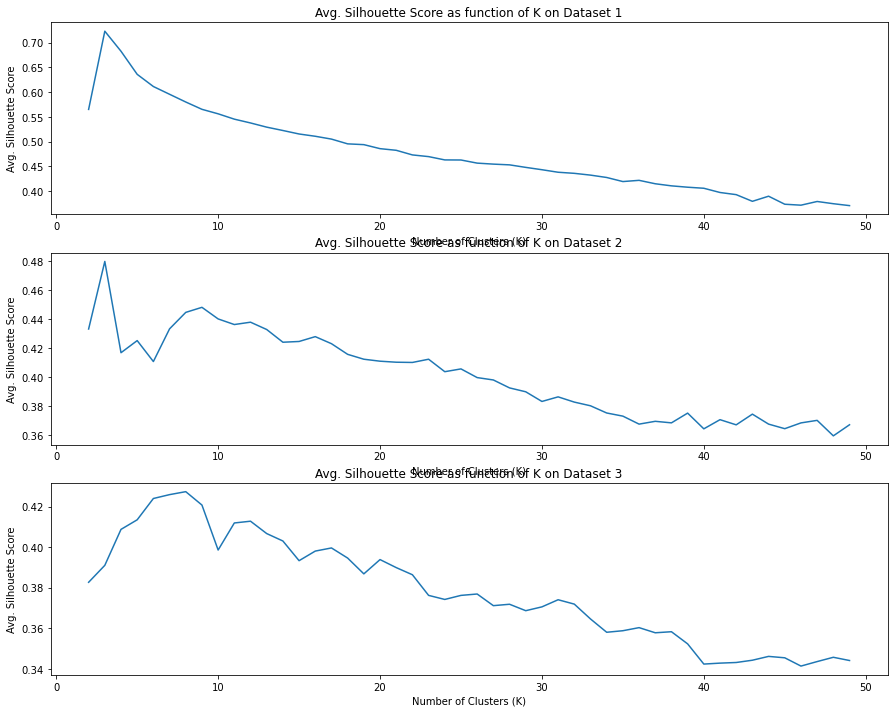

In [7]:
%%time
LONG_COMPUTE=False

scores_history = []
ks_history = []

if LONG_COMPUTE:
    fig, ax = fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(15,12))

    for i, (data, ax) in enumerate(zip(datasets,axes)):
        kmeans = KMeans(random_state=SEED)
        ks, scores, best_k, best_score = find_best_K(data,kmeans,high_K=50)
        
        scores_history.append(scores)
        ks_history.append(ks)
        
        ax.plot(ks,scores)
        ax.set_title("Avg. Silhouette Score as function of K on Dataset {}".format(i+1))
        ax.set_xlabel("Number of Clusters (K)")
        ax.set_ylabel("Avg. Silhouette Score")

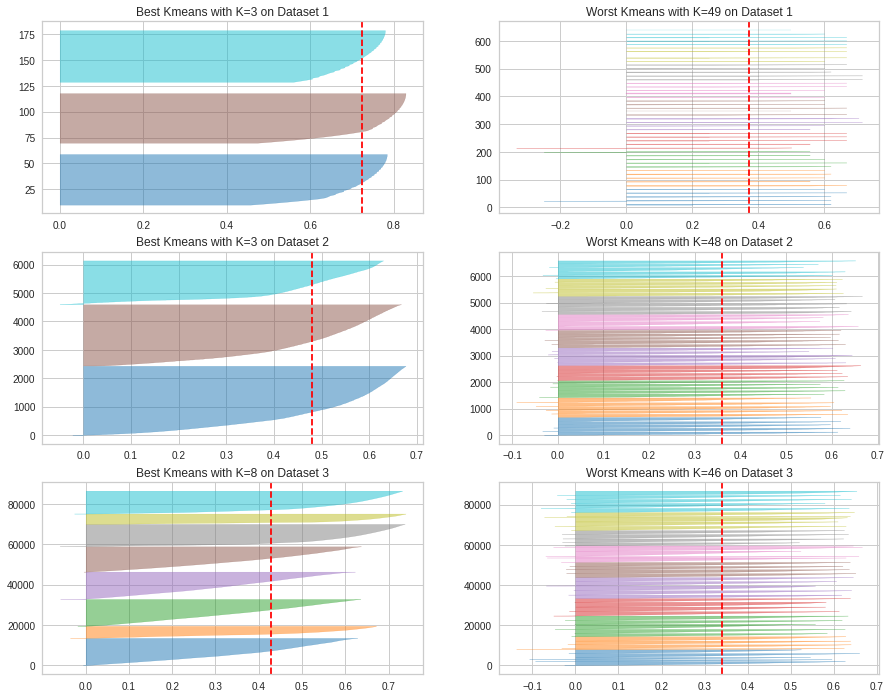

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,12))

for i, (data, ax, ks, scores) in enumerate(zip(datasets,axes,ks_history,scores_history)):
    selected_ks = [ks[np.argmax(scores)], ks[np.argmin(scores)]] # chose best and worst k
    titles = ["Best Kmeans with K={} on Dataset {}","Worst Kmeans with K={} on Dataset {}"]
    for j,(k,title) in enumerate(zip(selected_ks,titles)):
        kmeans = KMeans(n_clusters=k,random_state=SEED)
        sil = SilhouetteVisualizer(kmeans,colors='tab10',ax=ax[j])
        sil.fit(data)
        ax[j].set_title(title.format(k,i+1))

# DBScan

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. At the beginning try using a pair of Minpts and Eps of your choice.

In [12]:
from sklearn.cluster import DBSCAN

def compute_DBSCAN(data,eps,minpts):
    """helper function"""
    dbscan = DBSCAN(eps=eps,min_samples=minpts).fit(data)
    noise_sample_indeces = np.where(dbscan.labels_== -1) ## noise is sample is always labeled with -1
    
    return dbscan.labels_, dbscan.core_sample_indices_, noise_sample_indeces[0], 

def plot_DBSCAN_clusters(data, labels, core_samples,noise_samples, ax):
    
    ax.scatter(data[core_samples,0],data[core_samples,1], c=labels[core_samples], cmap='tab10',marker='.') # core pts
    ax.scatter(data[noise_samples,0],data[noise_samples,1], c='black', marker='x',alpha=0.025) #noise pts
    

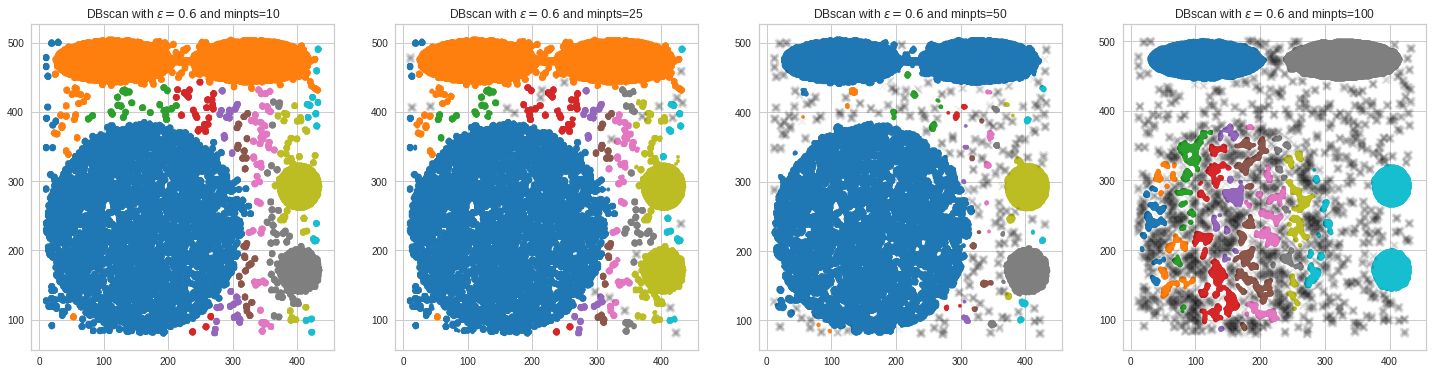

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(25,6))

min_samples=[10,25,50,100]
for min_sample, ax in zip(min_samples,axes):
    labels, corepts, noisepts = compute_DBSCAN(data3, eps=6.0, minpts=min_sample)
    plot_DBSCAN_clusters(data3, labels, corepts, noisepts,ax)
    ax.set_title("DBscan with $\epsilon=0.6$ and minpts={}".format(min_sample))
    
    

## Reachability Analysis

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [14]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
#from kneed import KneeLocator


def calcolo_eps(data, minpts, num_dataset):
  minpts = minpts

  # Calcolo la distanza media tra ogni punto del dataset e i suoi "n" vicini più vicini (il mio valore MinPts selezionato)
  clf_neighbors = NearestNeighbors(n_neighbors= minpts)
  clf_neighbors_fit = clf_neighbors.fit(data)

  # distances è un vettore contente le distanze dai punti
  # indices  è un simile a distances, ma con gli id dei punti inviece delle distanze
  distances, indices = clf_neighbors_fit.kneighbors(data) # kneighbors -> Finds the K-neighbors of a point.

  # Una matrice con le distanze dal decimo punto in ordine decrescente.
  # k-distances list
  k_distances = distances[:, minpts -1]
  k_index= indices[:, minpts-1]


  # ordino i valori delle distance in ordine crescente ed effettuo il plot
  reach_dist_sorted = sorted(k_distances)

  plt.plot(reach_dist_sorted)
  plt.title("The sorted reachability distances for dataset" + str(num_dataset))
  plt.xlabel("points")
  plt.ylabel("eps")

In [15]:
def compute_reachability_distance(data, K=10):
    knn = NearestNeighbors(n_neighbors=K).fit(data)
    distances, indeces = knn.kneighbors(data) # get KNN distance matrix
    kth_distances = distances[:,K-1] # get only distance from the Kth neighbor
    sorted_distances = kth_distances[np.argsort(kth_distances)] # sort the distances
   
    xs = np.arange(0,len(sorted_distances))
    
    return xs, sorted_distances



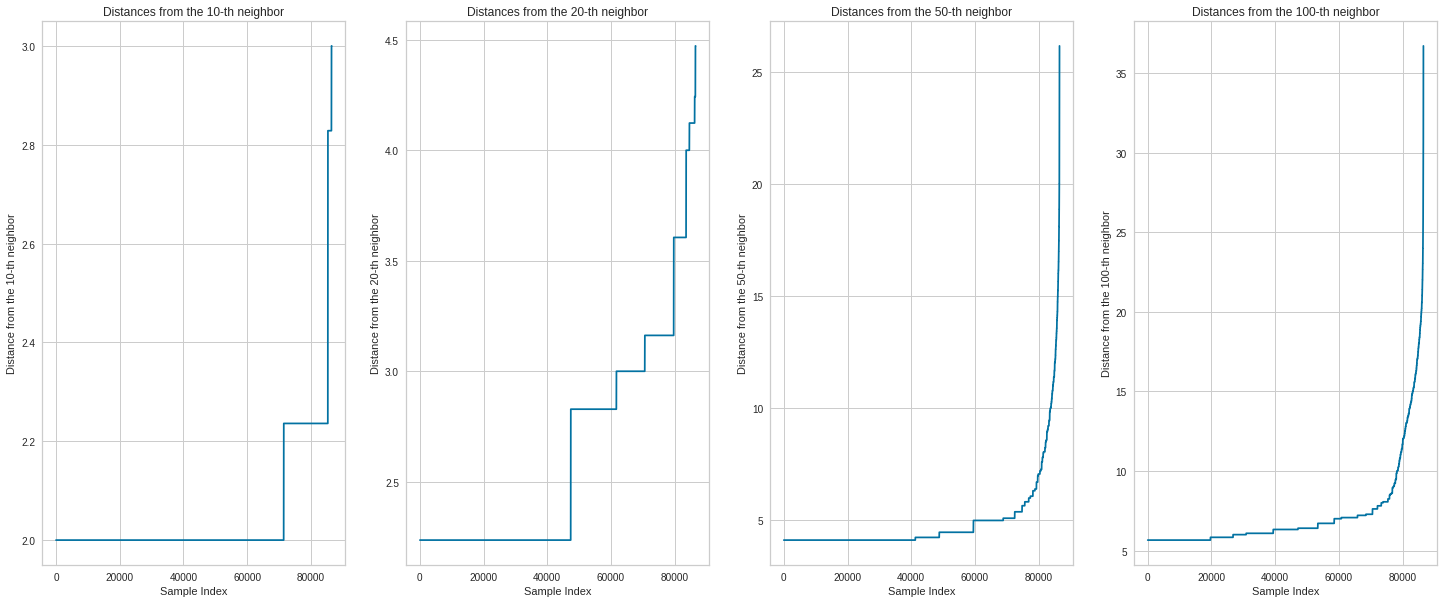

In [16]:

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(25,10))
Ks = [10,20,50,100]

for K, ax in zip(Ks,axes):
    xs, dist = compute_reachability_distance(data3, K=K)
    ax.plot(xs, dist)
    ax.set_title("Distances from the {}-th neighbor".format(K))
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Distance from the {}-th neighbor".format(K))

## Visualize DBScan clusters with best parameters

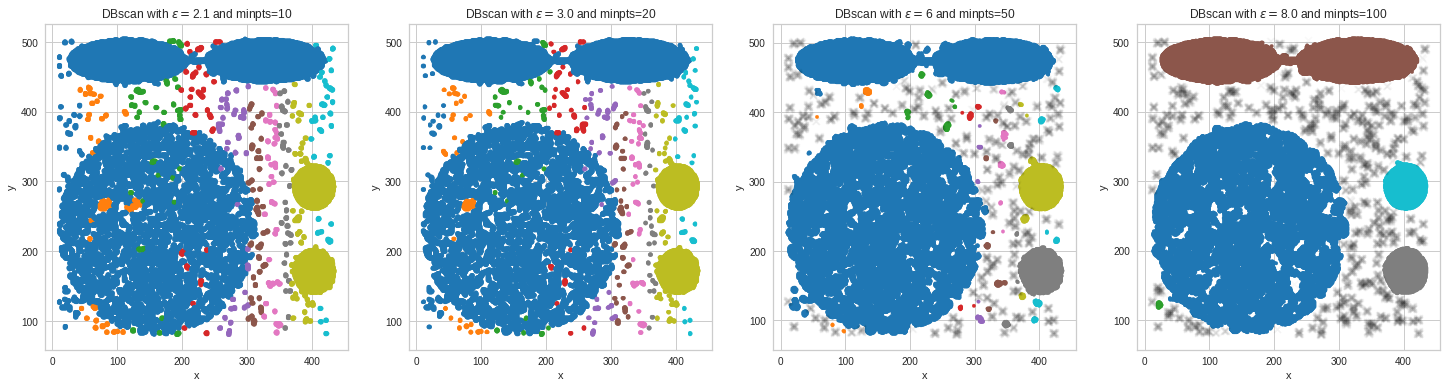

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(25,6))

best_eps = [2.1, 3.0, 6,8.0]
min_pts = [10,20,50,100]

for eps, K, ax in zip(best_eps,min_pts,axes):
    labels, corepts, noisepts = compute_DBSCAN(data3, eps=eps, minpts=K)
    plot_DBSCAN_clusters(data3, labels, corepts, noisepts,ax)
    ax.set_title("DBscan with $\epsilon=${} and minpts={}".format(eps,K))
    ax.set_xlabel("x")
    ax.set_ylabel("y".format(K))
